In [1]:
#Data Analysis
import numpy as np
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_csv('winemag-data-130k-v2.csv')
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
data=data.drop(columns=["Unnamed: 0","description"])
data=data.reset_index(drop=True)

In [4]:
data.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [6]:
#Missing Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 12 columns):
country                  129908 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


In [7]:
total=data.isnull().sum().sort_values(ascending=False)
percent=(data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=["Total","Percent"])
missing_data

,Total,Percent
region_2,79460,61.136715
designation,37465,28.825661
taster_twitter_handle,31213,24.015357
taster_name,26244,20.192197
region_1,21247,16.347493
price,8996,6.921544
province,63,0.048472
country,63,0.048472
variety,1,0.000769
winery,0,0.000000


In [8]:
data=data.dropna(subset=["price"])
data=data.reset_index(drop=True)

In [9]:
data[(data["price"]>2200)]

,country,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
14744,France,NaN,96,2500.0,Bordeaux,Pomerol,NaN,Roger Voss,@vossroger,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,Château Pétrus
74674,France,NaN,88,3300.0,Bordeaux,Médoc,NaN,Roger Voss,@vossroger,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet
91549,France,NaN,96,2500.0,Burgundy,La Romanée,NaN,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair


In [10]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

def pastel_plot(data,x,y):
    plt.figure(figsize=(15,6))
    plt.title("Points histogram - whole dataset")
    sns.set_color_codes("pastel")
    sns.barplot(x=x,y=y,data=df)
    locs,labels=plt.xticks()
    plt.show()

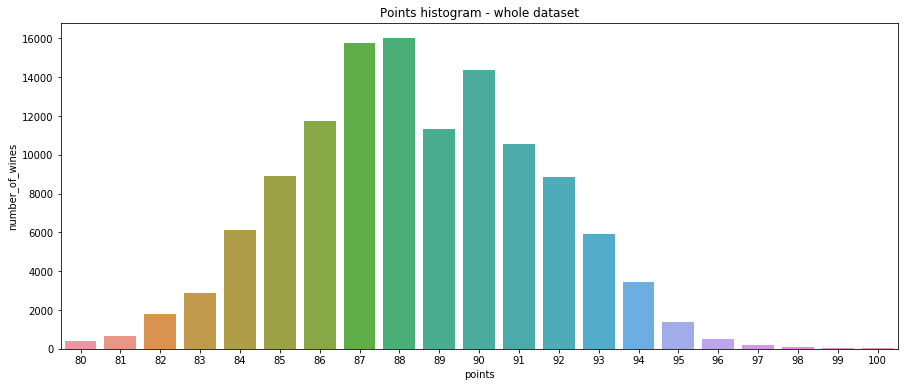

In [11]:
temp=data["points"].value_counts()
df=pd.DataFrame({"points":temp.index,"number_of_wines":temp.values})
pastel_plot(df,"points","number_of_wines")

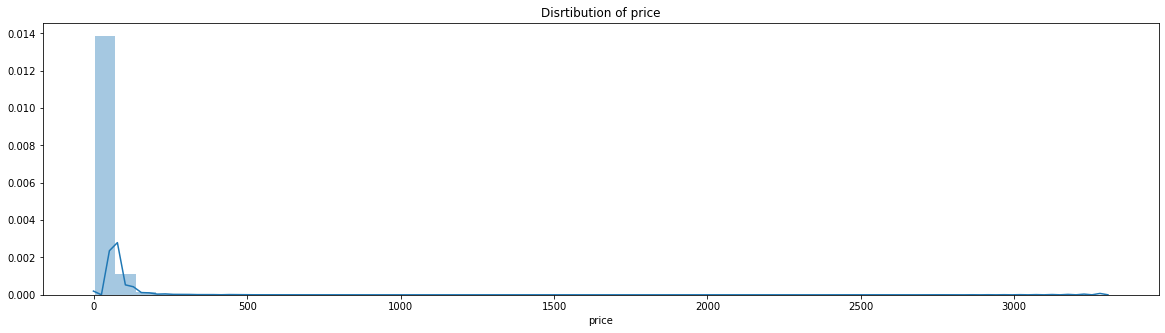

In [12]:
plt.figure(figsize=(20,5))
plt.title("Disrtibution of price")
ax=sns.distplot(data["price"])

There are : 0.5637528414961769 % wines more expensive than 200 USD


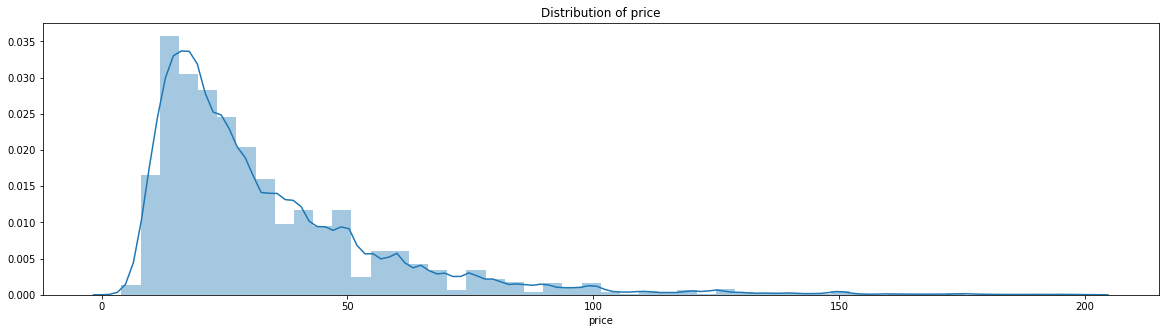

In [13]:
plt.figure(figsize=(20,5))
plt.title("Distribution of price")
ax=sns.distplot(data[data["price"]<200]["price"])

percent=data[data["price"]>200].shape[0]/data.shape[0]*100
print("There are :",percent,"% wines more expensive than 200 USD")

In [14]:
z=data.groupby(["country"])["price","points"].mean().reset_index().sort_values("price",ascending=False)
z[["country","price"]].head(n=10)

,country,price
37,Switzerland,85.285714
13,England,51.681159
16,Germany,42.257547
14,France,41.139120
18,Hungary,40.648276
21,Italy,39.663770
39,US,36.573464
7,Canada,35.712598
2,Australia,35.437663
20,Israel,31.768916


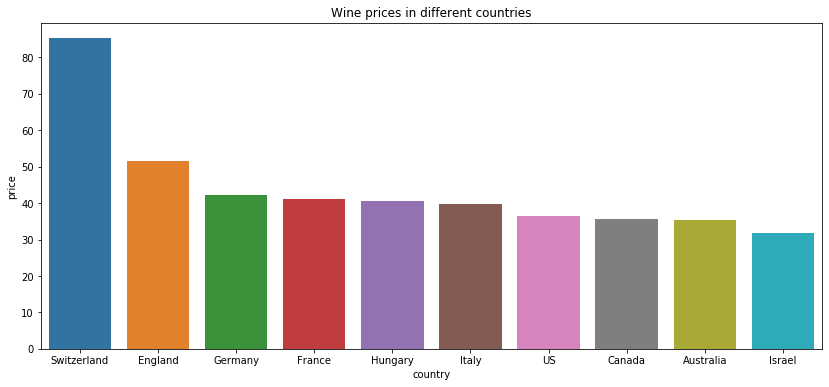

In [15]:
plt.figure(figsize=(14,6))
plt.title("Wine prices in different countries")
sns.barplot(x="country",y="price",data=z.head(10))
locs,labels=plt.xticks()
plt.show()

In [16]:
z=z.sort_values("points",ascending=False)
z[["country","points"]].head(10)

,country,points
13,England,91.550725
19,India,90.222222
3,Austria,90.190782
16,Germany,89.836321
7,Canada,89.377953
18,Hungary,89.165517
9,China,89.000000
14,France,88.734867
23,Luxembourg,88.666667
21,Italy,88.618186


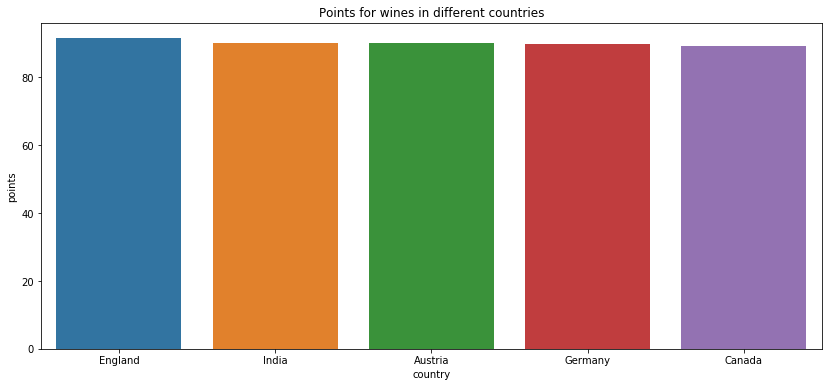

In [17]:
plt.figure(figsize=(14,6))
plt.title("Points for wines in different countries")
sns.set_color_codes("pastel")
sns.barplot(x="country",y="points",data=z.head(5))
locs,labels=plt.xticks()
plt.show()

US              54265
France          17776
Italy           16914
Spain            6573
Portugal         4875
Chile            4416
Argentina        3756
Austria          2799
Australia        2294
Germany          2120
New Zealand      1378
South Africa     1293
Israel            489
Greece            461
Canada            254
Hungary           145
Bulgaria          141
Romania           120
Uruguay           109
Turkey             90
Name: country, dtype: int64

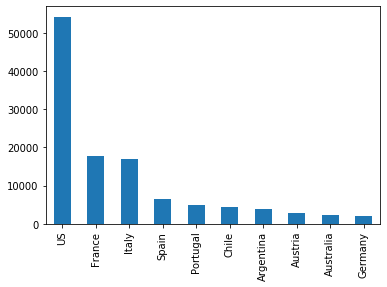

In [18]:
country=data["country"].value_counts()
country.head(10).plot.bar()
country.head(20)

In [19]:
z["quality/price"]=z["points"]/z["price"]
z.sort_values("quality/price",ascending=False)[["country","quality/price"]]

,country,quality/price
40,Ukraine,9.124031
4,Bosnia and Herzegovina,6.920000
19,India,6.766667
1,Armenia,6.034483
6,Bulgaria,6.004358
31,Romania,5.668671
24,Macedonia,5.572193
33,Slovakia,5.437500
11,Cyprus,5.357542
26,Moldova,5.207490


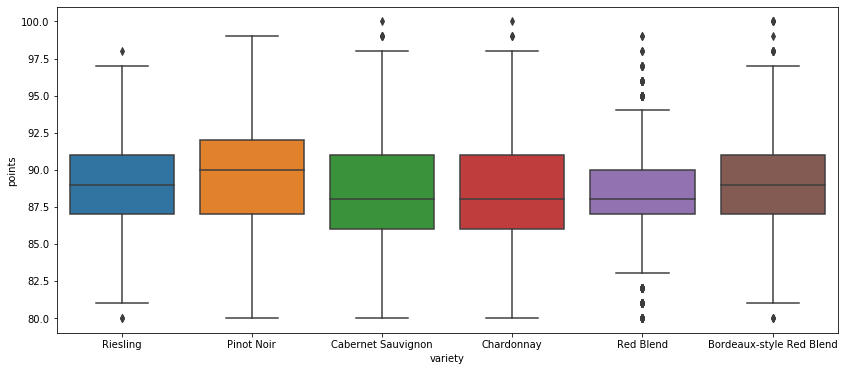

In [20]:
df1=data[data.variety.isin(data.variety.value_counts().head(6).index)]

plt.figure(figsize=(14,6))
sns.boxplot(x="variety",y="points",data=df1)